c:\users\bumso\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\bumso\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\bumso\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

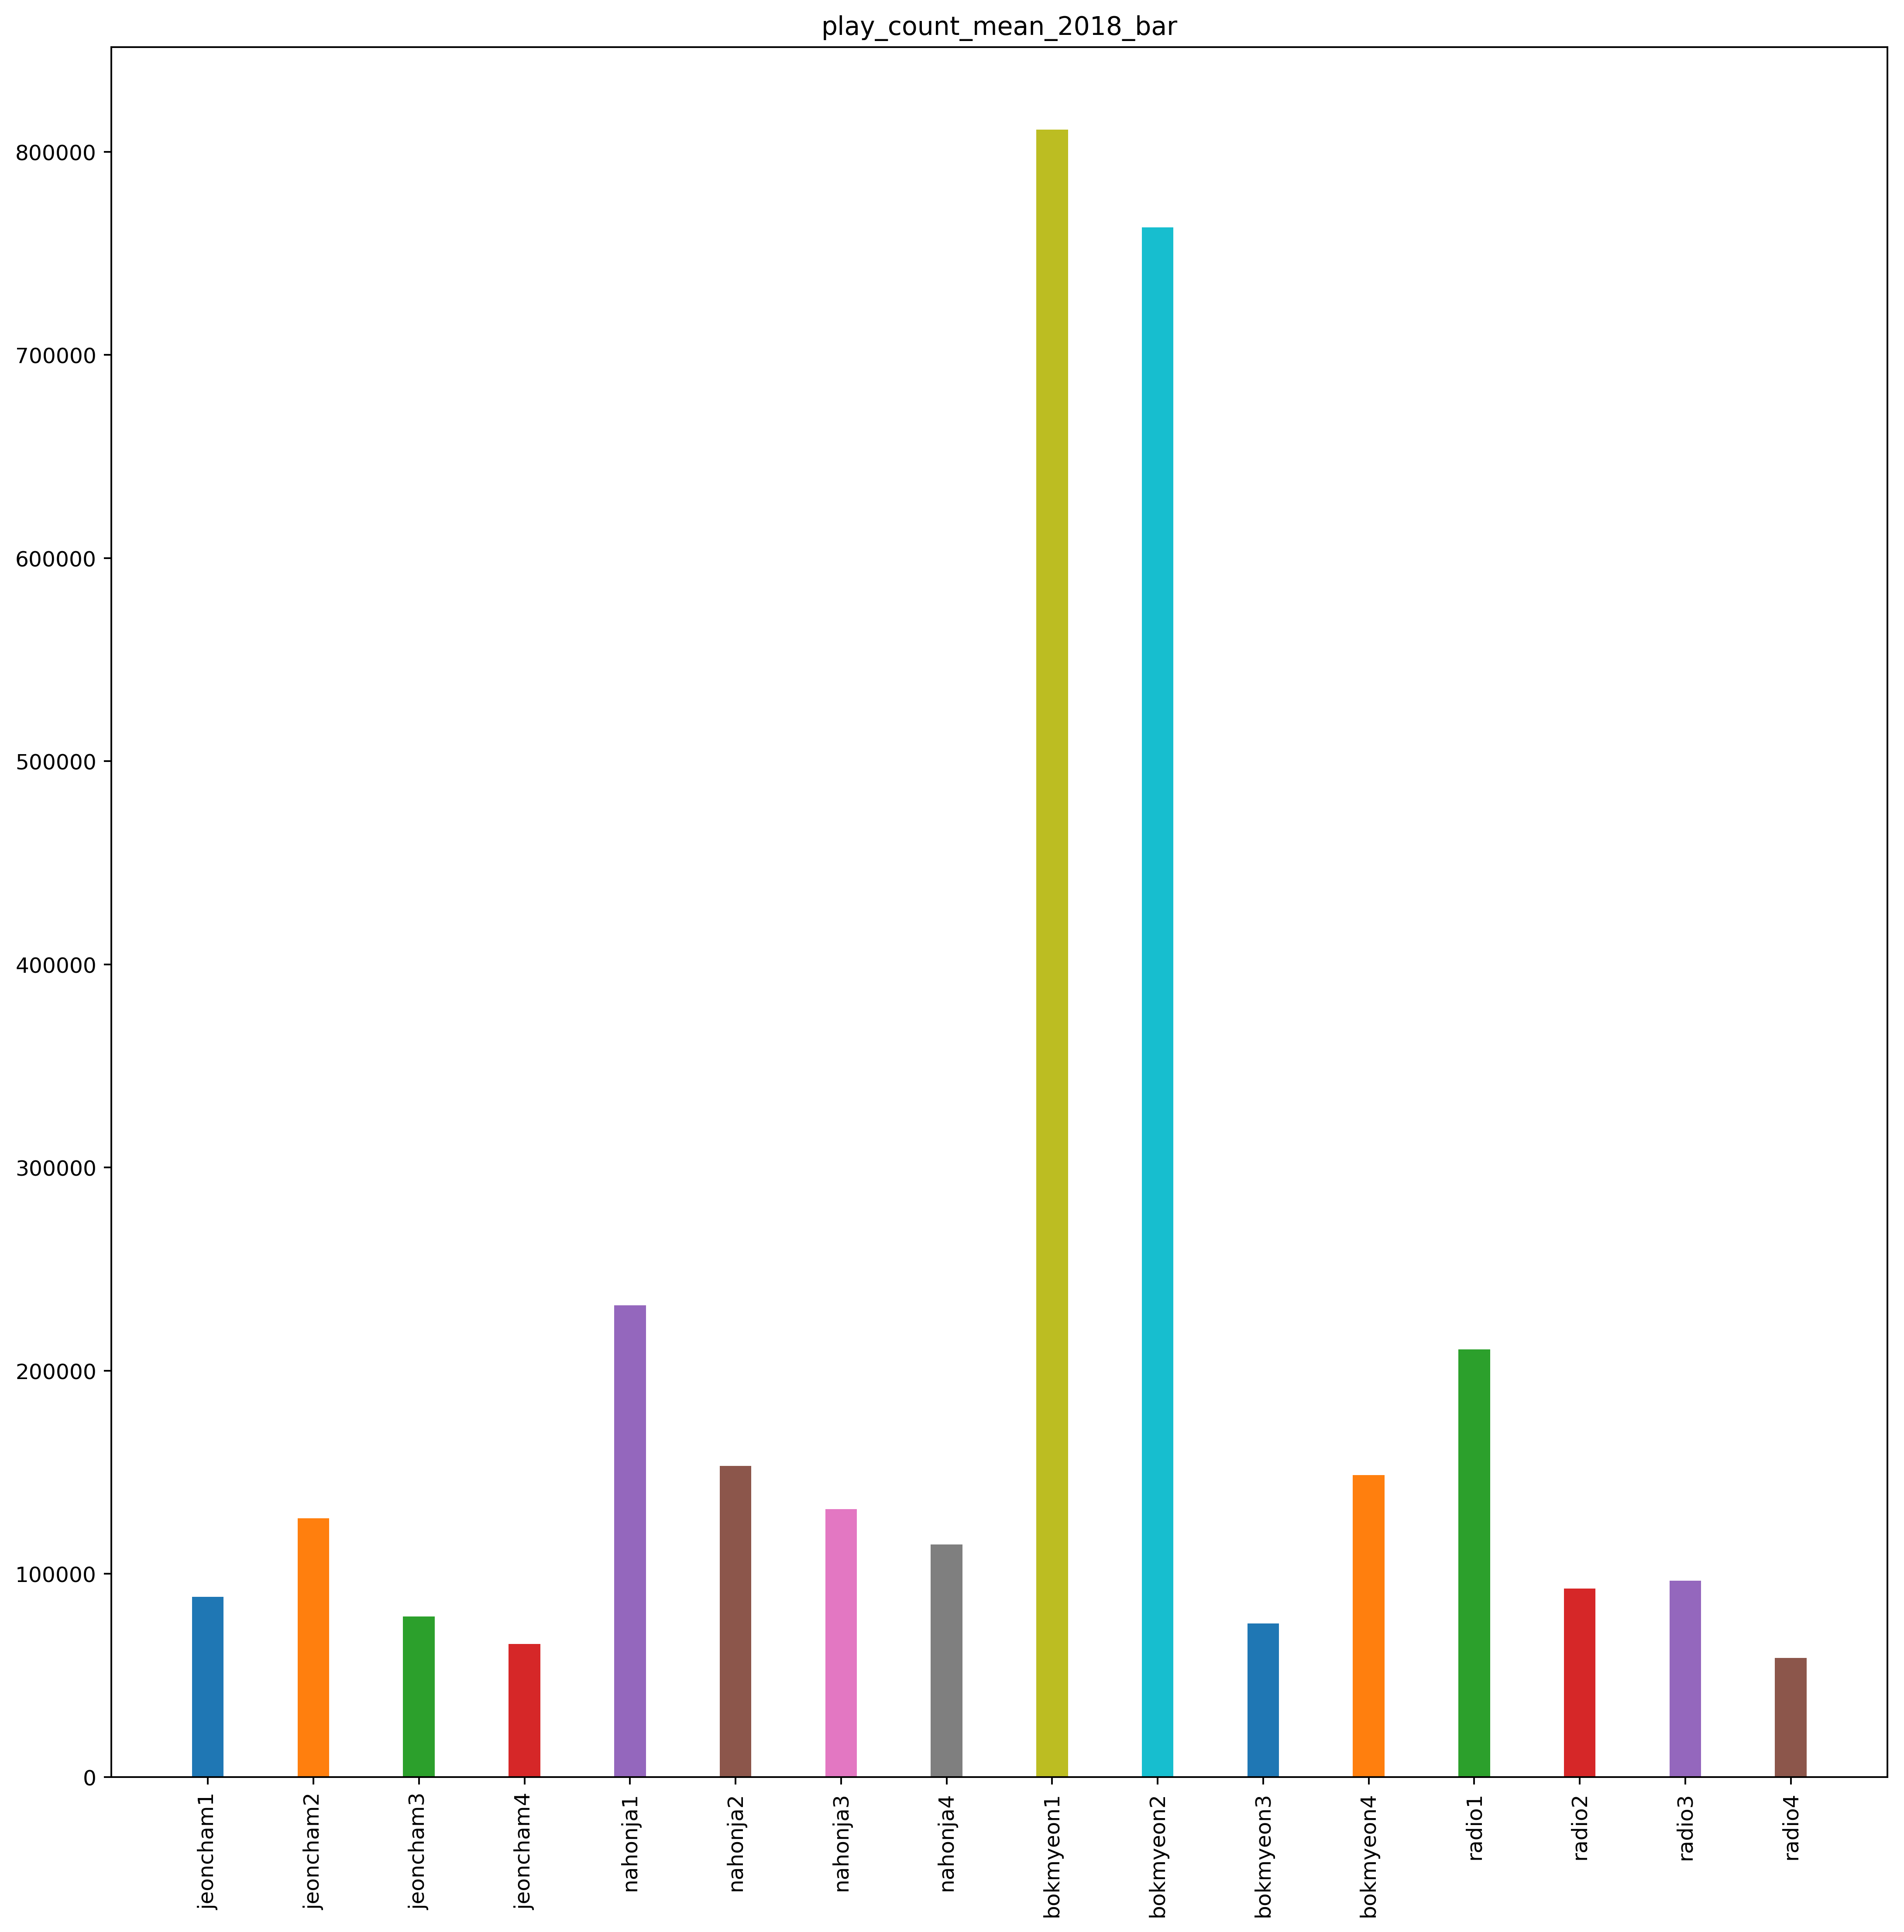

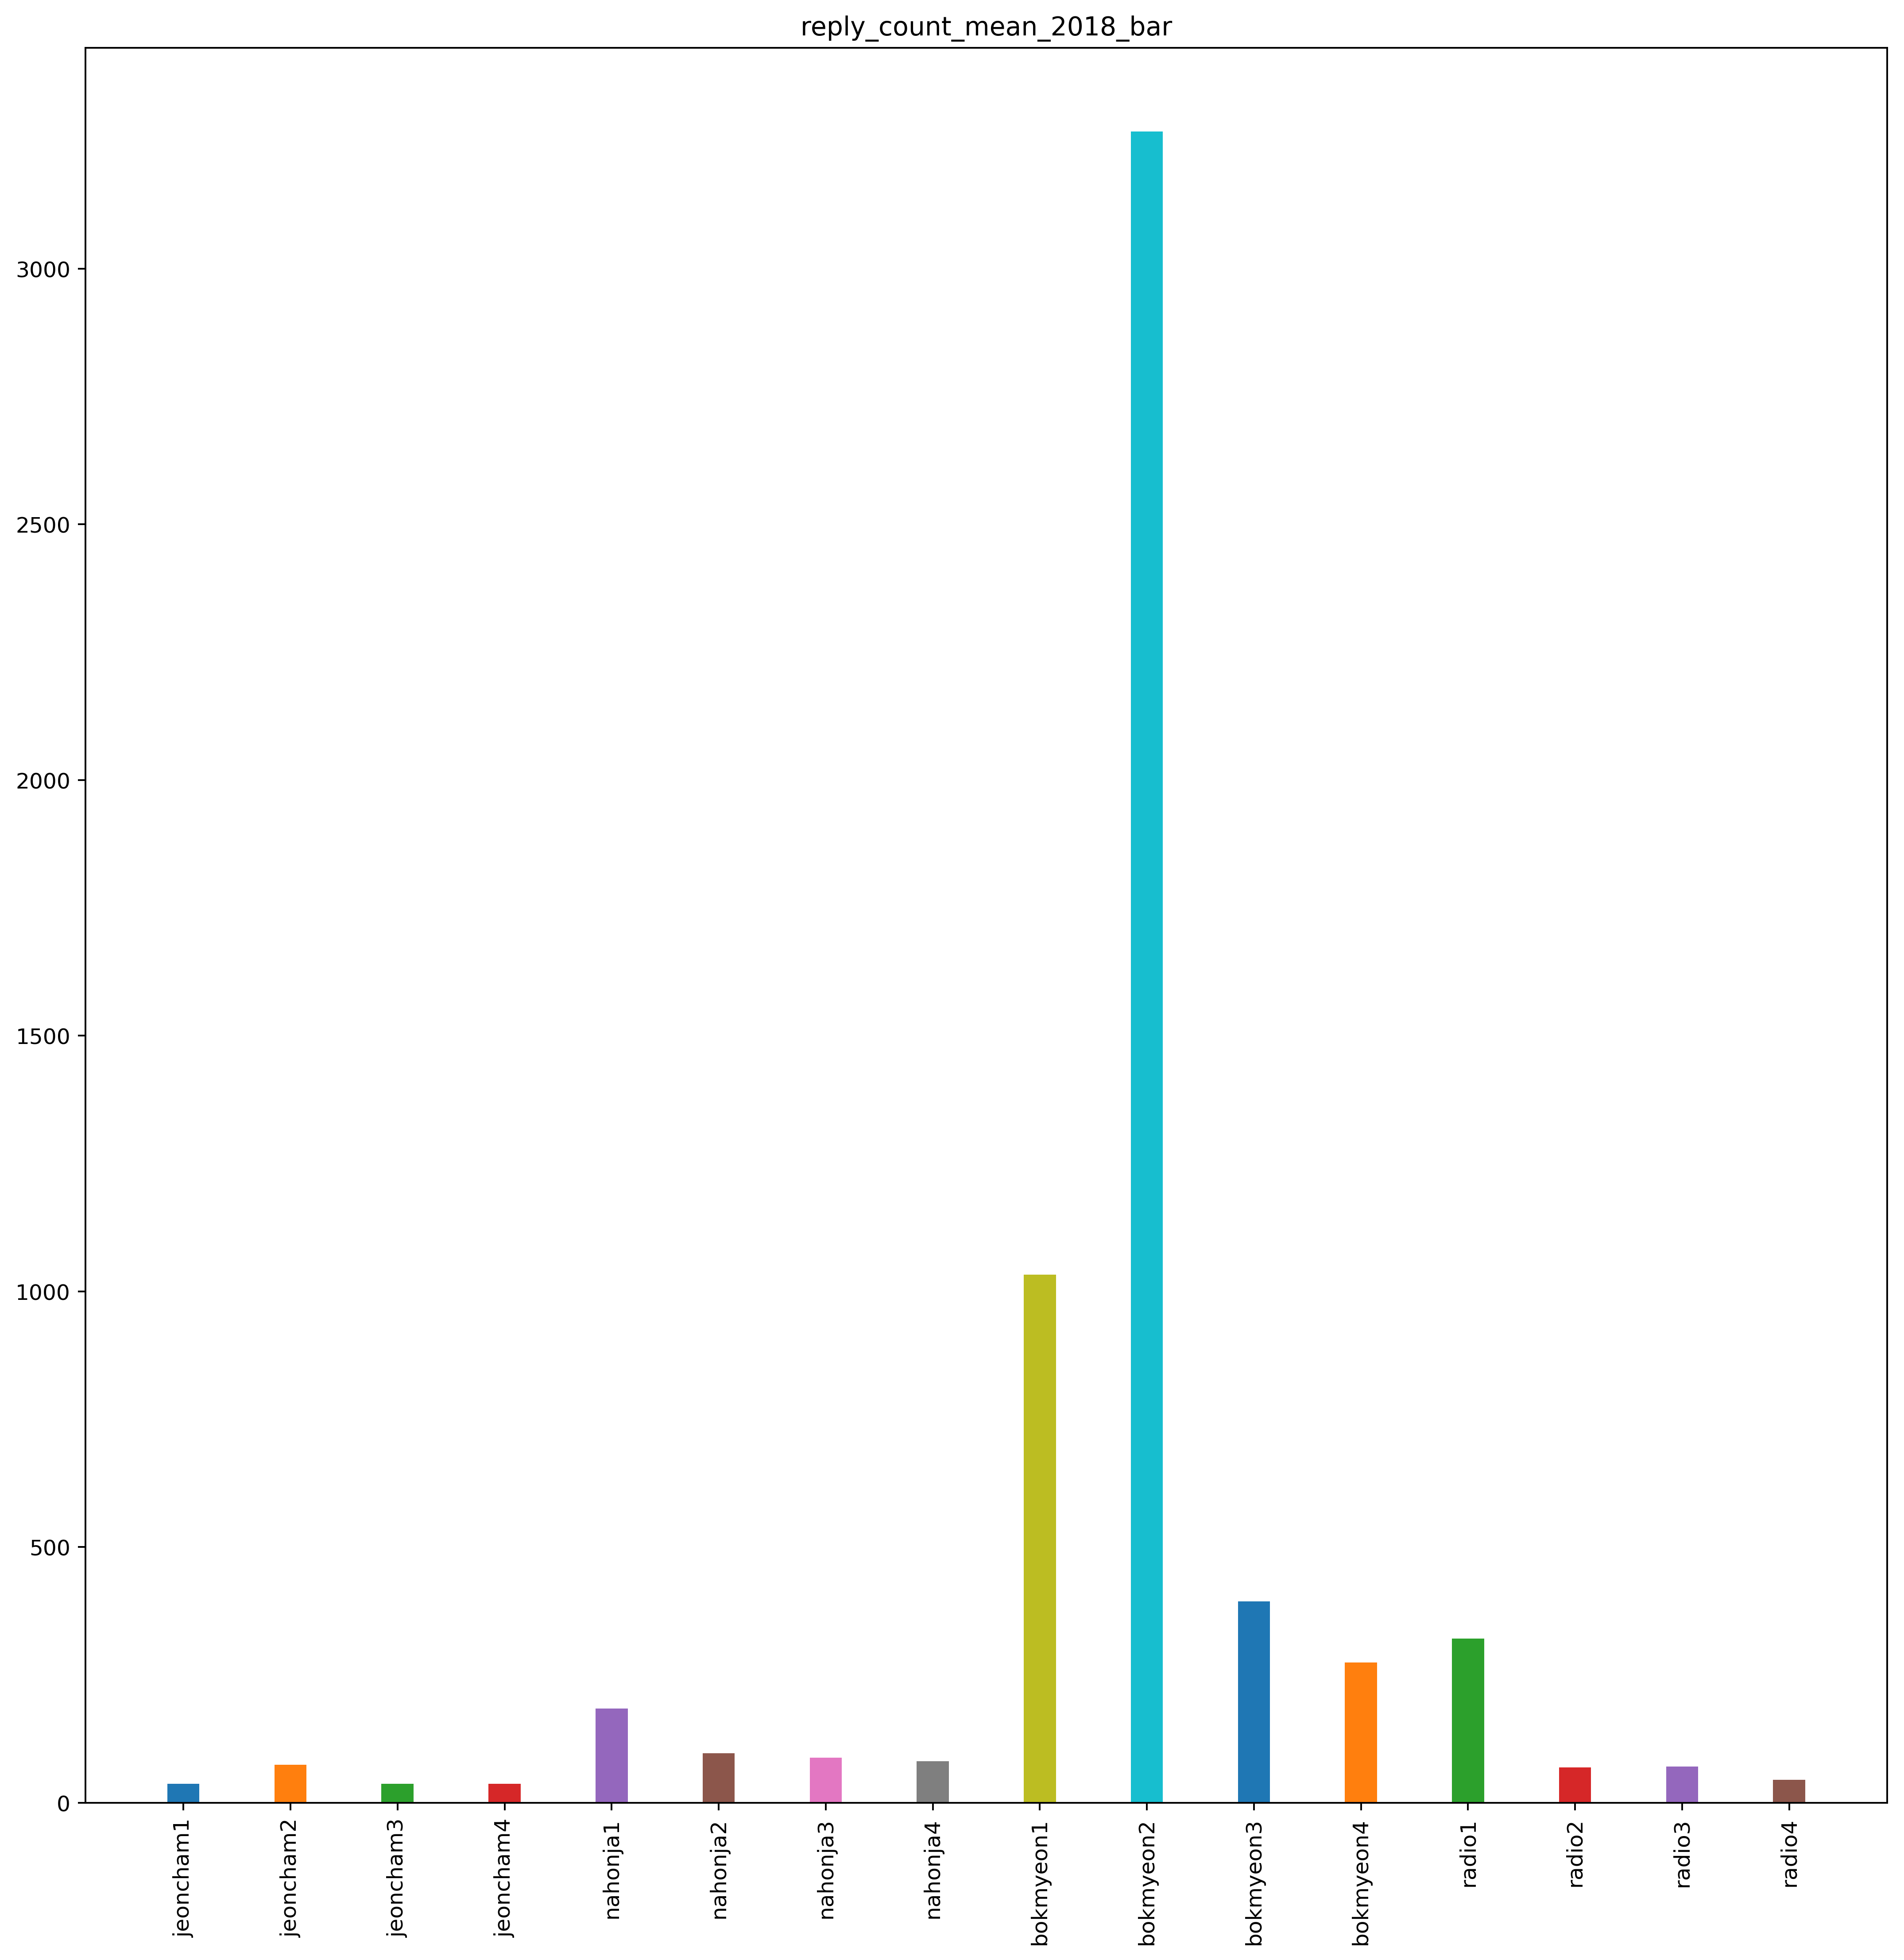

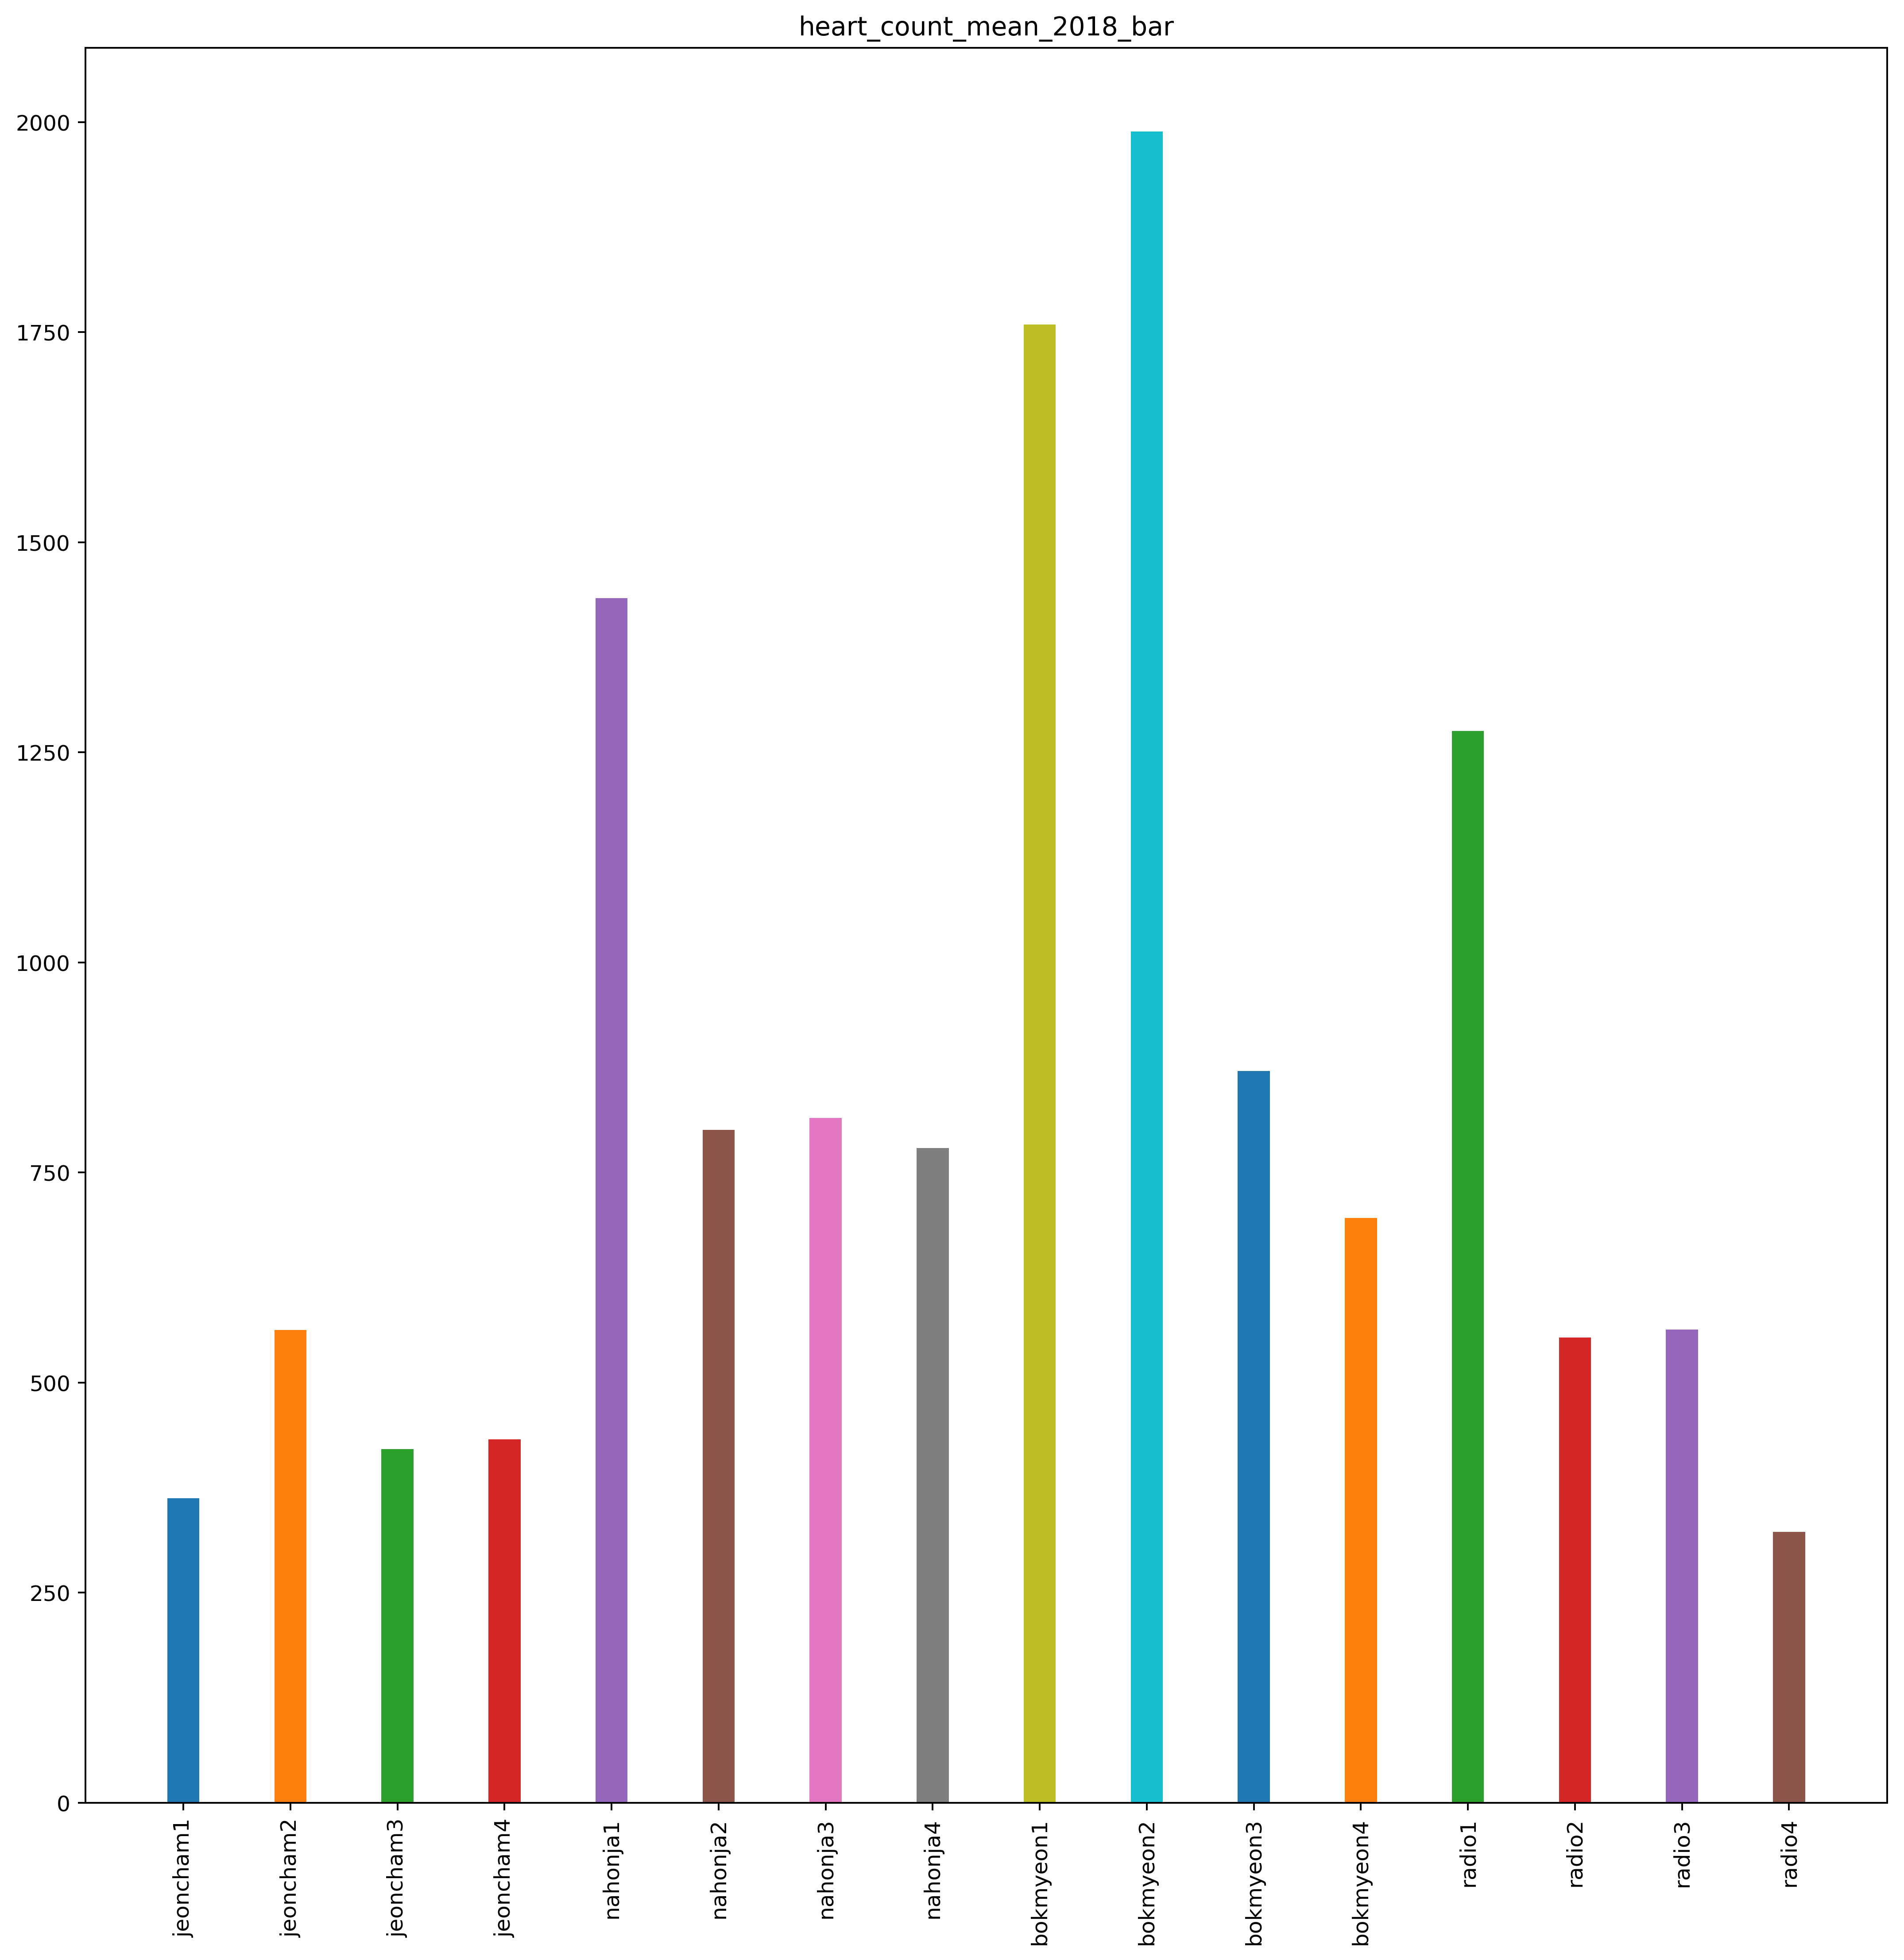

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime 
get_ipython().run_line_magic('matplotlib', 'inline')

def opener(url):
    with open(url, 'r', encoding = 'utf-8') as file:
        data = pd.read_json(file, orient = 'records')

    data_date = data.dropna(how = 'any')

    def converter(d) :
        if type(d) == int:
            return d
        elif type(d) == str:

            r = d.replace(',','')
            if r != '':
                return int(r)
            else :
                return 0

    data_date['reply_count'] = data_date['reply_count'].apply(lambda d : converter(d))
    data_date['play_count'] = data_date['play_count'].apply(lambda d : converter(d))
    data_date['heart_count'] = data_date['heart_count'].apply(lambda d : converter(d))

    data_reflist = []
    for date,rows in data_date.groupby("date"):
        data_ref = {}
        data_ref['date'] = date
        data_ref['heart_count_mean'] = rows.heart_count.mean()
        data_ref['play_count_mean'] = rows.play_count.mean()
        data_ref['reply_count_mean'] = rows.reply_count.mean()
        data_reflist.append(data_ref)

    pand = pd.DataFrame.from_records(data_reflist)

    pand['qt1'] = pand.date.apply(lambda e: datetime.datetime(2018,1,1) <= e < datetime.datetime(2018,4,1))
    pand['qt2'] = pand.date.apply(lambda e: datetime.datetime(2018,4,1) <= e < datetime.datetime(2018,7,1))
    pand['qt3'] = pand.date.apply(lambda e: datetime.datetime(2018,7,1) <= e < datetime.datetime(2018,10,1))
    pand['qt4'] = pand.date.apply(lambda e: datetime.datetime(2018,10,1) <= e < datetime.datetime(2019,1,1))

    return pand


#open files
jeoncham = opener(r"C:\Users\bumso\datajournalism-2018\datajournalism-team-1\Beomsoo\navertv_json_data\2018\jeoncham_2018.json")
# mudo = mudo.iloc[1:]   #무도는 2009년 데이터가 하나 포함되어 있어서 그 데이터 제거해줌.
nahonja = opener(r"C:\Users\bumso\datajournalism-2018\datajournalism-team-1\Beomsoo\navertv_json_data\2018\nahonja_2018.json")
bokga = opener(r"C:\Users\bumso\datajournalism-2018\datajournalism-team-1\Beomsoo\navertv_json_data\2018\bokga_2018.json")
radio = opener(r"C:\Users\bumso\datajournalism-2018\datajournalism-team-1\Beomsoo\navertv_json_data\2018\radio_2018.json")
data_list = [(jeoncham,'jeoncham'), (nahonja,'nahonja'), (bokga,'bokga'), (radio,'radio')]


'''
시계열 그래프 그리기!
'''

def time_graph(data_list, category):

    #2017/1/1 ~ 2018/1/1 까지의 날짜 list 생성
    # start_day = datetime.datetime(2015,1,1)   
    # one_day = datetime.timedelta(days = 1)    
    # end_day = datetime.datetime(2015,12,28) # 2017 연예대상 시상식 날짜 기준

    # date_list = []
    
    # while start_day < end_day:
    #     date_list.append(start_day)
    #     start_day = start_day + one_day
        
    plt.figure(num = None, figsize = (15,15), dpi = 350)
    
    x1 = data_list[0][0]['date']
    y1 = data_list[0][0][category]
    x2 = data_list[1][0]['date']
    y2 = data_list[1][0][category]
    x3 = data_list[2][0]['date']
    y3 = data_list[2][0][category]
    x4 = data_list[3][0]['date']
    y4 = data_list[3][0][category]
    plt.plot(x1, y1, label = data_list[0][1], color = 'r')
    plt.plot(x2, y2, label = data_list[1][1], color = 'y')
    plt.plot(x3, y3, label = data_list[2][1], color = 'g')
    plt.plot(x4, y4, label = data_list[3][1], color = 'b')   
    plt.legend()
    plt.title(category + "2015")
    plt.xticks(rotation=90)
    plt.savefig(category + "2015")
    return
    plt.show()

# time_graph(data_list, 'heart_count_mean')
# time_graph(data_list, 'reply_count_mean')
# time_graph(data_list, 'play_count_mean')


'''
분기별 평균 그래프 그리기!
'''

def bar_graph(data_list, category):
    j = data_list[0][0]
    n = data_list[1][0]
    b = data_list[2][0]
    r = data_list[3][0]

    plt.figure(num = None, figsize = (15,15), dpi = 350)
    
    plt.bar("jeoncham1", j[j.qt1][category].mean(), width=0.3)
    plt.bar("jeoncham2", j[j.qt2][category].mean(), width=0.3)
    plt.bar("jeoncham3", j[j.qt3][category].mean(), width=0.3)
    plt.bar("jeoncham4", j[j.qt4][category].mean(), width=0.3)
    plt.bar("nahonja1", n[n.qt1][category].mean(), width=0.3)
    plt.bar("nahonja2", n[n.qt2][category].mean(), width=0.3)
    plt.bar("nahonja3", n[n.qt3][category].mean(), width=0.3)
    plt.bar("nahonja4", n[n.qt4][category].mean(), width=0.3)
    plt.bar("bokmyeon1", b[b.qt1][category].mean(), width=0.3)
    plt.bar("bokmyeon2", b[b.qt2][category].mean(), width=0.3)
    plt.bar("bokmyeon3", b[b.qt3][category].mean(), width=0.3)
    plt.bar("bokmyeon4", b[b.qt4][category].mean(), width=0.3)
    plt.bar("radio1", r[r.qt1][category].mean(), width=0.3)
    plt.bar("radio2", r[r.qt2][category].mean(), width=0.3)
    plt.bar("radio3", r[r.qt3][category].mean(), width=0.3)
    plt.bar("radio4", r[r.qt4][category].mean(), width=0.3)

    plt.title(category + "_2018_bar")
    plt.xticks(rotation = 90)
    plt.savefig(category + "_2018_bar")
    plt.show()

bar_graph(data_list, "play_count_mean")
bar_graph(data_list, "reply_count_mean")
bar_graph(data_list, "heart_count_mean")


In [3]:
print(jeoncham[jeoncham.qt4]['play_count_mean'].mean(), nahonja[nahonja.qt4]['play_count_mean'].mean(),bokga[bokga.qt4]['play_count_mean'].mean(),radio[radio.qt4]['play_count_mean'].mean() )


65419.69840506716 114403.92687574057 148662.26495511024 58593.910130718956
